In [8]:
import os, sys
import glob
import logging
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as pyfits
import astropy.wcs as pywcs

os.environ['CRDS_PATH'] = os.path.expanduser('/lustre/JDAP/home/jdap02/crds')
os.environ['CRDS_SERVER_URL'] = 'https://jwst-crds.stsci.edu'
import jwst

# grizli stuff
import grizli
from grizli import utils, prep, jwst_utils, multifit, fitting, model
from grizli.pipeline import auto_script

utils.set_warnings()

print('Grizli version: ', grizli.__version__)
print('jwst pipeline version: ', jwst.__version__)

# Quiet JWST log warnings
jwst_utils.QUIET_LEVEL = logging.WARNING
jwst_utils.set_quiet_logging(jwst_utils.QUIET_LEVEL)

Grizli version:  1.9
jwst pipeline version:  1.14.0


In [9]:
# set home path
HOME_PATH = '/lustre/JDAP/home/jdap02/start_from_s1/'
field_root = 'glass-2022data'    # the root directory for this data reduction

# first set up pipeline parameters
os.chdir(os.path.join(HOME_PATH, field_root))
kwargs = auto_script.get_yml_parameters()


sh: aws: command not found


In [25]:
# = = = = = = = = = = = = = = = = = =
# 1. Generate fit parameters
# = = = = = = = = = = = = = = = = = =
os.chdir(os.path.join(HOME_PATH, field_root, 'Extractions'))

# first define some key parameters for running grism-fit

# maglim = [16, 28]
skip_complete = False
size=40     # half-width of the Y-axis of beam fits extensions
zr=[0.05, 10.]
# dz = [0.1, 0.05]
dz = [0.01, 0.0005]
fcontam=0.1
min_sens=0.0
min_mask=0.0
sys_err=0.03

pline = {'kernel': 'square', 'pixfrac': 0.75, 'pixscale': 0.03, 'size': 8, 'wcs': None}

# find more lines at  `utils.DEFAULT_LINE_LIST`
full_line_list=['Lya', 'CIV-1549', 'HeII-1640', 'CIII-1906', 'MgII', 'OII', 'NeIII-3867', 'Hg', 'OIII-4363', 'Hb', 'OIII', 'Ha', 'Ha+NII', 'SII', 'SIII','PaB','He-1083','PaA']

#### Store fits parameters to `fit_args.npy` for batch-mode processing
args_file = 'fit_args.npy'

# Generate the parameter dictionary
args = auto_script.generate_fit_params(field_root=field_root, prior=None, MW_EBV=0, pline=pline,
                                       fit_only_beams=True, run_fit=True, poly_order=7, fsps=True,
                                       min_sens=min_sens, sys_err=sys_err, fcontam=fcontam, zr=zr, dz=dz, min_mask=min_mask,
                                       save_file=args_file, include_photometry=True, use_phot_obj=True,
                                       bad_pa_threshold=10., full_line_list=full_line_list)

# reset the input parameter values to those recorded in `args`
zr=args['zr']
dz=args['dz']
fcontam=args['fcontam']
min_sens=args['min_sens']
min_mask=args['min_mask']
sys_err=args['sys_err']
MW_EBV=args['MW_EBV']

print('\n zr: ', zr)
print('\b dz: ', dz)
print('\b fcontam: ', fcontam)
print('\b min_sens: ', min_sens)
print('\b min_mask: ', min_mask)
print('\b sys_err: ', sys_err)
print('\b MW_EBV: ', MW_EBV)


Read default param file: /lustre/JDAP/conda-env/grizli-jwst/lib/python3.11/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: glass-2022data_phot_apcorr.fits
   >>> NOBJ = 5280
f115w_tot_0 f115w_etot_0 (309): niriss-f115w
f150w_tot_0 f150w_etot_0 (310): niriss-f150w
f200w_tot_0 f200w_etot_0 (311): niriss-f200w
Set sys_err = 0.05 (positive=True)
Read PRIOR_FILE:  templates/prior_F160W_TAO.dat
Template grid: templates/fsps_full/tweak_fsps_QSF_12_v3.param (this may take some time)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.50it/s]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 3.980 s


256it [00:00, 1888.93it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:05<00:00,  2.93it/s]

Template   0: fsps/fsps_QSF_12_v3_nolines_001.dat (NZ=1).
Template   1: fsps/fsps_QSF_12_v3_nolines_002.dat (NZ=1).
Template   2: fsps/fsps_QSF_12_v3_nolines_003.dat (NZ=1).
Template   3: fsps/fsps_QSF_12_v3_nolines_004.dat (NZ=1).
Template   4: fsps/fsps_QSF_12_v3_nolines_005.dat (NZ=1).
Template   5: fsps/fsps_QSF_12_v3_nolines_006.dat (NZ=1).
Template   6: fsps/fsps_QSF_12_v3_nolines_007.dat (NZ=1).
Template   7: fsps/fsps_QSF_12_v3_nolines_008.dat (NZ=1).
Template   8: fsps/fsps_QSF_12_v3_nolines_009.dat (NZ=1).
Template   9: fsps/fsps_QSF_12_v3_nolines_010.dat (NZ=1).
Template  10: fsps/fsps_QSF_12_v3_nolines_011.dat (NZ=1).
Template  11: fsps/fsps_QSF_12_v3_nolines_012.dat (NZ=1).
Template  12: alf_SSP.dat (NZ=1).
Template  13: line Ha+NII+SII+SIII+He+PaB (NZ=1).
Template  14: line OIII+Hb+Hg+Hd (NZ=1).
Template  15: line OII+Ne (NZ=1).
Template  16: line Gal-UV-lines (NZ=1).
Saved arguments to fit_args.npy.

 zr:  [0.05, 10.0]
 dz:  [0.01, 0.0005]
 fcontam:  0.1
 min_sens:  0

In [26]:
# = = = = = = = = = = = = = = = = = =
# 2. Load up pre-existing GrismFLT files
# = = = = = = = = = = = = = = = = = =
os.chdir(os.path.join(HOME_PATH, field_root, 'Extractions'))

#------------ Initialize grp object
master_files = glob.glob('*GrismFLT.fits')
master_files.sort()
catalog = glob.glob('{0}-*.cat.fits'.format(field_root))[0]
seg_file = glob.glob('{0}-*_seg.fits'.format(field_root))[0]
grp = multifit.GroupFLT(grism_files=master_files, direct_files=[], ref_file=None, seg_file=seg_file, catalog=catalog,
                        cpu_count=-1, sci_extn=1, pad=800)


Load jw01324001001_03101_00001_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_03101_00002_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_03101_00003_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_03101_00004_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_05101_00001_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_05101_00002_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_05101_00003_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_05101_00004_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_09101_00001_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_09101_00002_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_09101_00003_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_09101_00004_nis.01.GrismFLT.fits!
Transform JWST WFSS: fl

In [27]:
# = = = = = = = = = = = = = = = = = =
# 3. Fit indvd objects for testing
# = = = = = = = = = = = = = = = = = =
### Place your favourite objects here for modelling and extraction
### below for the object presented in Wang et al. (2022), http://arxiv.org/abs/2207.13113

targets = utils.GTable()
targets['id'] = np.array(['zgrad1'])
targets['ra'] = np.array([3.585943])
targets['dec'] = np.array([-30.382102])

idx, dr = grp.catalog.match_to_catalog_sky(targets)
indices = []
for i, n in enumerate(idx):
    if dr[i].value > 1.:
        print(targets['id'][i], ' not matched...')
        continue
    else:
        indices.append(i)

obj = utils.GTable()
obj['id'] = grp.catalog['NUMBER'][idx][indices]
obj['ra'] = targets['ra'][indices]
obj['dec'] = targets['dec'][indices]
obj['idx'] = idx[indices]
obj['dr'] = dr[indices]  # .to(u.mas)
obj['dr'].format = '0.2f'
obj['name'] = targets['id'][indices]

print(obj)


 id     ra       dec     idx    dr    name 
       deg       deg          arcsec       
---- -------- ---------- ---- ------ ------
4349 3.585943 -30.382102 4348   0.00 zgrad1


1/1: 4349
glass-2022data_04349.beams.fits
Run id=4349 with fit_args.npy
load_master_fits: glass-2022data_04349.beams.fits
1 jw01324001001_03101_00001_nis_rate.fits GR150R
2 jw01324001001_03101_00002_nis_rate.fits GR150R
3 jw01324001001_03101_00003_nis_rate.fits GR150R
4 jw01324001001_03101_00004_nis_rate.fits GR150R
5 jw01324001001_05101_00001_nis_rate.fits GR150C
6 jw01324001001_05101_00002_nis_rate.fits GR150C
7 jw01324001001_05101_00003_nis_rate.fits GR150C
8 jw01324001001_05101_00004_nis_rate.fits GR150C
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
9 jw01324001001_09101_00001_nis_rate.fits GR150R
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
10 jw01324001001_09101_00002_nis_rate.fits GR150R
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
11 jw01324001001_09101_00003_nis_rate.fits GR150R
 !! Shift GR150R.F150W.220725.conf along di

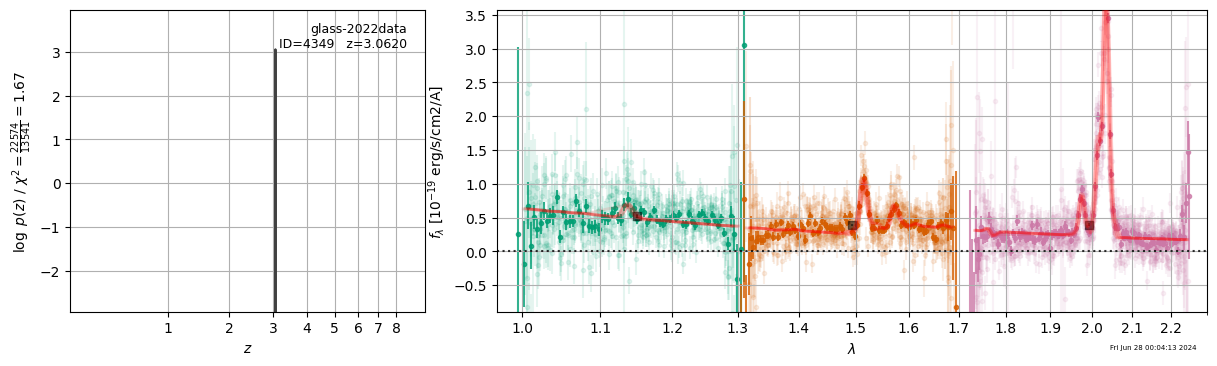

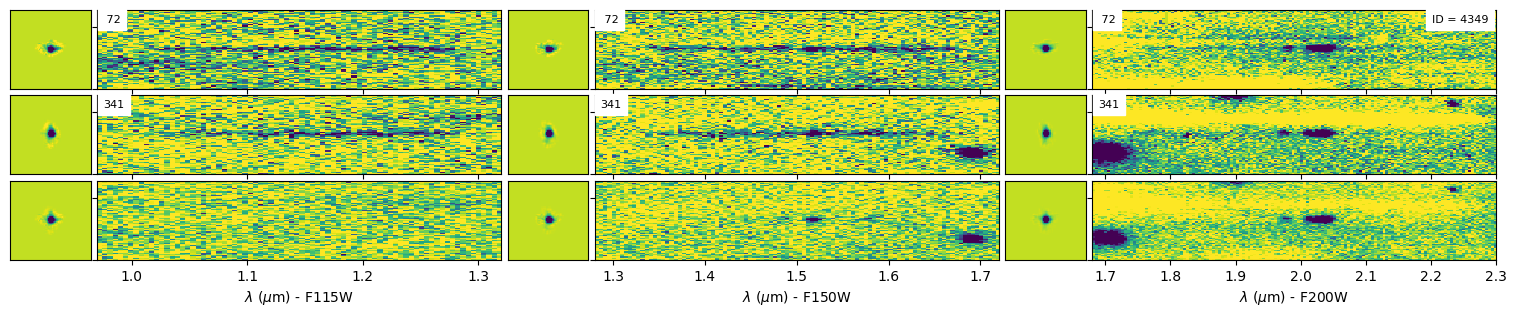

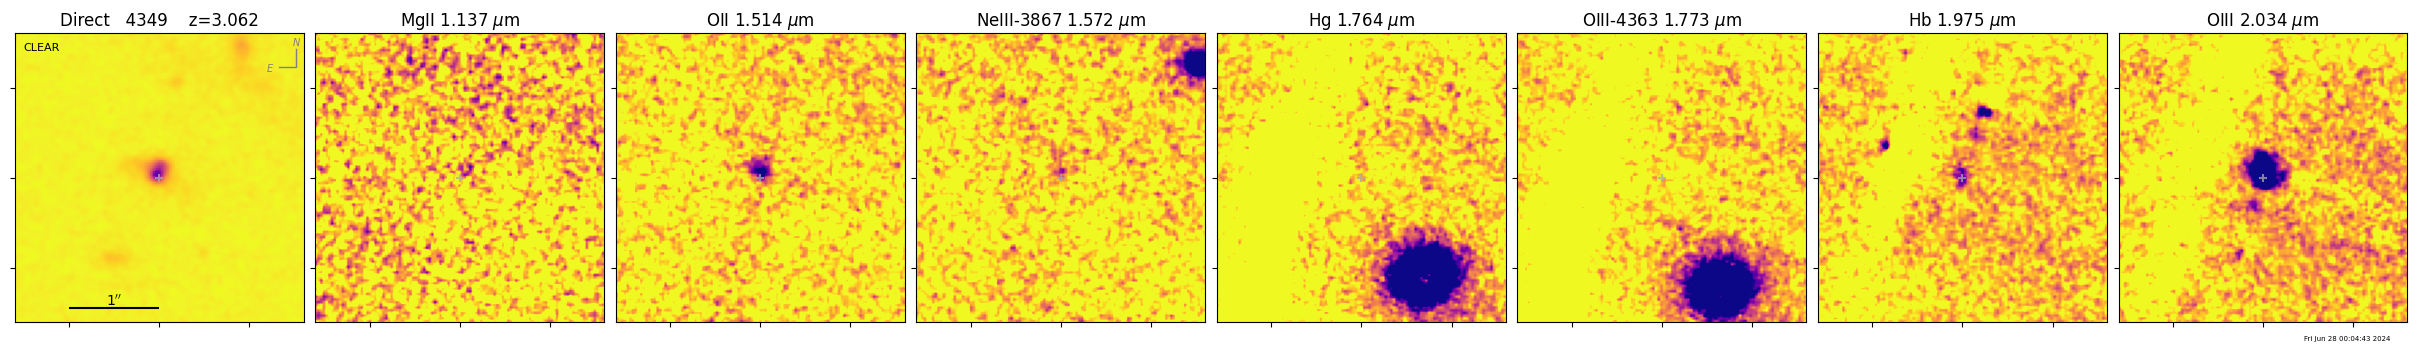

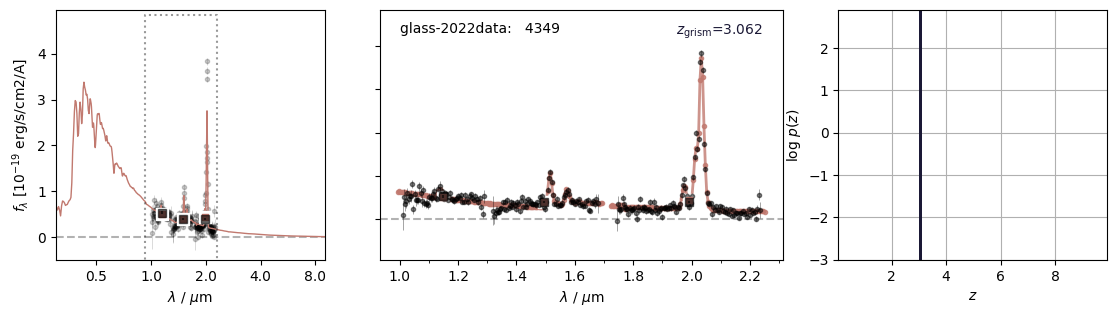

In [28]:
#------------ loop through ID list
for ii, id in enumerate(obj['id']):
    print('{0}/{1}: {2}'.format(ii+1, len(obj), id))

    beams = grp.get_beams(id, size=size, beam_id='A', min_sens=min_sens, min_mask=min_mask)
    if len(beams)==0:
        print(' -   -   >   empty beams for object ID {0:05d}'.format(id))
        continue

    mb = multifit.MultiBeam(beams, fcontam=fcontam, group_name=field_root, psf=False, MW_EBV=0, sys_err=sys_err, min_mask=min_mask, min_sens=min_sens)
    mb.write_master_fits()

    _ = fitting.run_all_parallel(id, zr=zr, verbose=True, get_output_data=True, skip_complete=False)

    print(' -   -   >   completed extraction for object ID {0:05d}'.format(id))



In [29]:

### below for the object presented in RB et al. (2022)
targets = utils.GTable()
targets['id'] = np.array(['JD'])
targets['ra'] = np.array([3.60452])
targets['dec'] = np.array([-30.38047])

idx, dr = grp.catalog.match_to_catalog_sky(targets)
indices = []
for i, n in enumerate(idx):
    if dr[i].value > 1.:
        print(targets['id'][i], ' not matched...')
        continue
    else:
        indices.append(i)

obj = utils.GTable()
obj['id'] = grp.catalog['NUMBER'][idx][indices]
obj['ra'] = targets['ra'][indices]
obj['dec'] = targets['dec'][indices]
obj['idx'] = idx[indices]
obj['dr'] = dr[indices]  # .to(u.mas)
obj['dr'].format = '0.2f'
obj['name'] = targets['id'][indices]

print(obj)


 id     ra      dec    idx    dr   name
       deg      deg         arcsec     
---- ------- --------- ---- ------ ----
4553 3.60452 -30.38047 4552   0.09   JD


1/1: 4553
glass-2022data_04553.beams.fits
Run id=4553 with fit_args.npy
load_master_fits: glass-2022data_04553.beams.fits
1 jw01324001001_03101_00001_nis_rate.fits GR150R
2 jw01324001001_03101_00002_nis_rate.fits GR150R
3 jw01324001001_03101_00003_nis_rate.fits GR150R
4 jw01324001001_03101_00004_nis_rate.fits GR150R
5 jw01324001001_05101_00001_nis_rate.fits GR150C
6 jw01324001001_05101_00002_nis_rate.fits GR150C
7 jw01324001001_05101_00003_nis_rate.fits GR150C
8 jw01324001001_05101_00004_nis_rate.fits GR150C
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
9 jw01324001001_09101_00001_nis_rate.fits GR150R
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
10 jw01324001001_09101_00002_nis_rate.fits GR150R
 !! Shift GR150R.F150W.220725.conf along dispersion
 ! Scale 0th order (B) by an additional x 1.5
11 jw01324001001_09101_00003_nis_rate.fits GR150R
 !! Shift GR150R.F150W.220725.conf along di

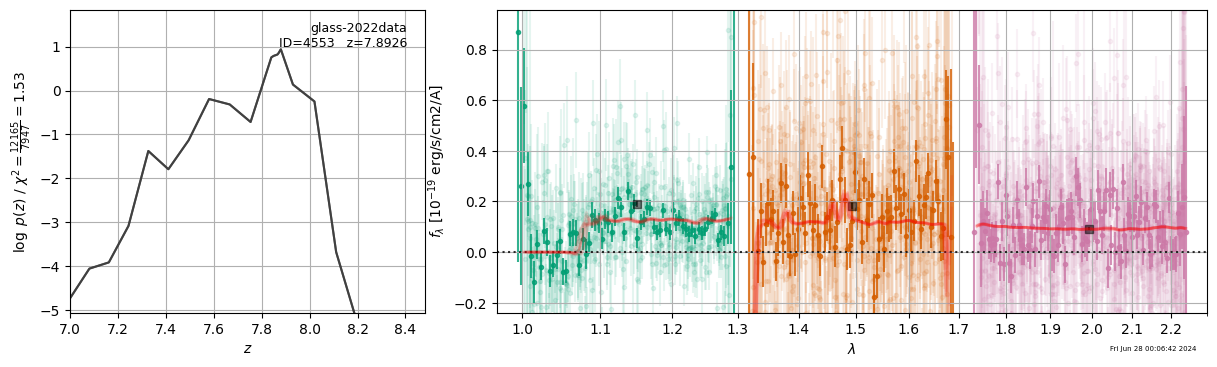

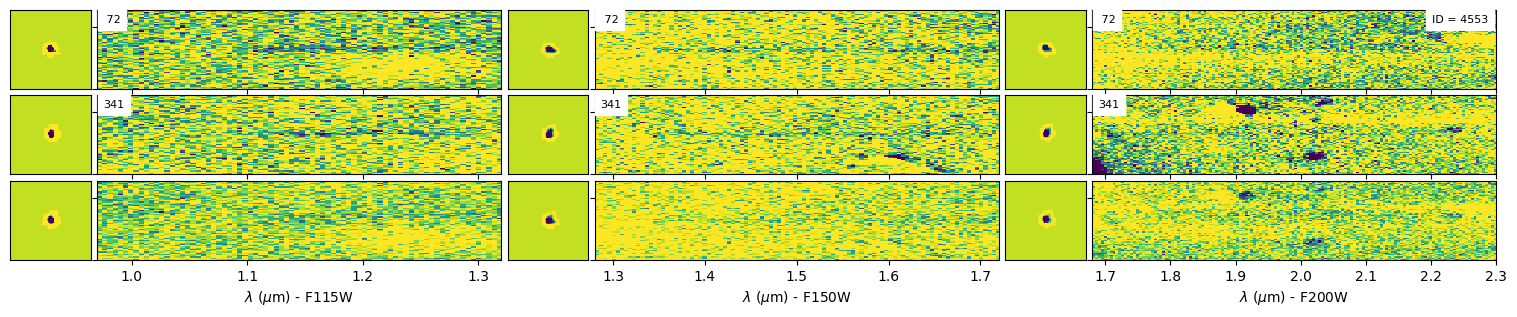

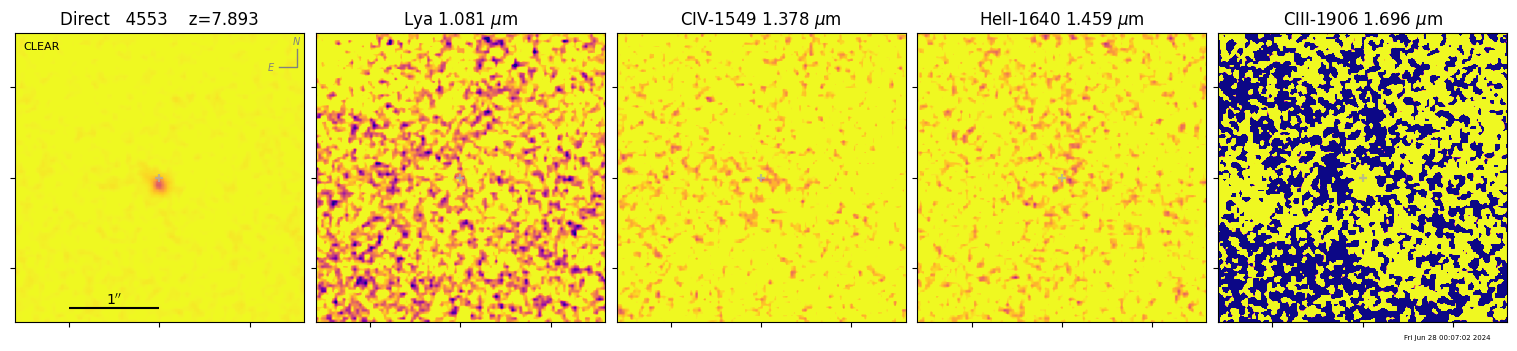

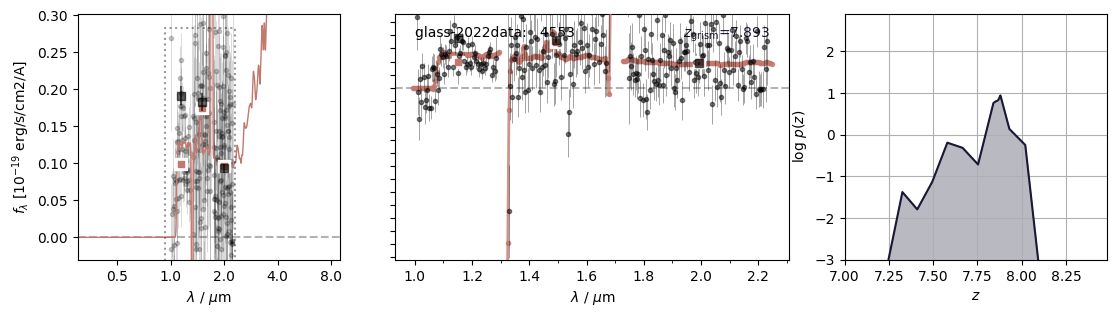

In [30]:
#------------ loop through ID list
for ii, id in enumerate(obj['id']):
    print('{0}/{1}: {2}'.format(ii+1, len(obj), id))

    beams = grp.get_beams(id, size=size, beam_id='A', min_sens=min_sens, min_mask=min_mask)
    if len(beams)==0:
        print(' -   -   >   empty beams for object ID {0:05d}'.format(id))
        continue

    mb = multifit.MultiBeam(beams, fcontam=fcontam, group_name=field_root, psf=False, MW_EBV=0, sys_err=sys_err, min_mask=min_mask, min_sens=min_sens)
    mb.write_master_fits()

    _ = fitting.run_all_parallel(id, zr=[7,8.5], verbose=True, get_output_data=True, skip_complete=False)

    print(' -   -   >   completed extraction for object ID {0:05d}'.format(id))

